### Cargar los Datos de Calidad de Agua

Lo primero que debemos hacer es abrir el archivo que contiene los datos que vamos a analizar. En este caso, el archivo se llama **"Calidad_de_agua_2021"**.

Para cargar el archivo en Python, utilizaremos la biblioteca `pandas`, que es ideal para manejar datos en formato de tablas (como CSV, Excel, etc.). A continuación, veremos cómo cargar este archivo y revisar sus primeras filas para asegurarnos de que todo está correcto.


In [233]:
# Importamos la librería pandas para el manejo de datos
import pandas as pd

# Cargamos el archivo "Calidad_de_agua_2021.csv" utilizando un delimitador personalizado (punto y coma)
raw_dataset = pd.read_csv("Calidad_de_agua_2021.csv", delimiter=';')

# Hacemos una copia del dataset original para realizar el preprocesamiento sin modificar los datos originales
preprocessed_dataset = raw_dataset.copy()

# Eliminamos columnas irrelevantes:
# - 'año': todas las mediciones son del año 2021, no aporta información adicional
# - 'orden', 'codigo': no son útiles para el análisis
# - 'fecha': la información sobre la fecha ya está contenida en la columna 'estación' y no varian durante la epoca
preprocessed_dataset = preprocessed_dataset.drop(['año', 'orden', 'codigo', 'fecha'], axis=1)

# Reemplazamos los valores 'no se midió' por valores nulos (NaN), para tratar los datos no medidos como ausentes
preprocessed_dataset = preprocessed_dataset.replace('no se midió', pd.NA)

# Eliminamos todas las filas que contienen valores nulos, ya que no queremos trabajar con datos incompletos
preprocessed_dataset = preprocessed_dataset.dropna()

## Exploración de la Información de la Base de Datos

Una vez que hemos cargado y limpiado los datos, es importante verificar la estructura general de nuestro conjunto de datos. Para esto, utilizamos el método `info()` de pandas, el cual nos proporciona una visión general de las columnas, el número de entradas no nulas, el tipo de datos de cada columna y el uso de memoria del DataFrame.

Este método es útil para:
- Verificar si hay columnas con valores nulos.
- Observar los tipos de datos de las columnas (importante para asegurarnos de que pandas está interpretando correctamente los datos).
- Tener una idea del tamaño del conjunto de datos.

In [234]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 165
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sitios                   121 non-null    object
 1   campaña                  121 non-null    object
 2   tem_agua                 121 non-null    object
 3   tem_aire                 121 non-null    object
 4   od                       121 non-null    object
 5   ph                       121 non-null    object
 6   olores                   121 non-null    object
 7   color                    121 non-null    object
 8   espumas                  121 non-null    object
 9   mat_susp                 121 non-null    object
 10  colif_fecales_ufc_100ml  121 non-null    object
 11  escher_coli_ufc_100ml    121 non-null    object
 12  enteroc_ufc_100ml        121 non-null    object
 13  nitrato_mg_l             121 non-null    object
 14  nh4_mg_l                 121 non-null    object

### Revisión de Tipos de Datos

Al examinar la información del conjunto de datos utilizando el método `info()`, hemos notado que **todas las columnas están clasificadas como de tipo `object`**. Sin embargo, sabemos que muchas de estas columnas contienen valores numéricos, lo que indica que el tipo de dato no ha sido interpretado correctamente por pandas.

Este es un problema común cuando se trabaja con archivos CSV u otros formatos, especialmente si los datos numéricos están representados como cadenas de texto (strings) debido a la forma en que se almacenaron o se importaron.

#### ¿Por qué es importante corregir esto?
Es fundamental que las columnas que deberían contener valores numéricos sean tratadas como tales. Esto permitirá:
- Realizar cálculos y análisis estadísticos correctos.
- Evitar errores o resultados incorrectos debido a la manipulación de datos como texto.

A continuación, corregiremos los tipos de datos para asegurar que las columnas con valores numéricos sean reconocidas y tratadas como tales.

#### Limpieza y Conversión de Tipos de Datos

En este paso, hemos realizado varias transformaciones y conversiones en algunas de las columnas del conjunto de datos:

##### 1. **Reemplazo de valores de texto por valores booleanos**:
Las columnas **'color'**, **'olores'**, **'espumas'** y **'mat_susp'** contenían valores de texto como `'Ausencia'` y `'Presencia'`, los cuales representaban la presencia o ausencia de ciertas características. Para facilitar el análisis, hemos reemplazado estos valores de texto por valores booleanos:

- **'Ausencia'** (y sus variaciones, como `'ausenca'`, `'Ausencia '`) ha sido reemplazado por **`False`**.
- **'Presencia'** ha sido reemplazado por **`True`**.

Este cambio nos permitirá trabajar con datos binarios y realizar análisis más fácilmente.


In [235]:
# Reemplazo de valores de texto por booleanos en varias columnas
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace(['ausenca', 'Ausencia ', 'Ausencia'], False)
preprocessed_dataset['color'] = preprocessed_dataset['color'].replace('Presencia', True)

preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace(['ausenca', 'Ausencia ', 'Ausencia'], False)
preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace('Presencia', True)

preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace(['ausenca', 'Ausencia ', 'Ausencia'], False)
preprocessed_dataset['espumas'] = preprocessed_dataset['espumas'].replace('Presencia', True)

preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace(['ausenca', 'Ausencia ', 'Ausencia'], False)
preprocessed_dataset['mat_susp'] = preprocessed_dataset['mat_susp'].replace('Presencia', True)

# Conversión de tipos de datos a numéricos (float y int)
preprocessed_dataset['tem_agua'] = preprocessed_dataset['tem_agua'].astype(float)
preprocessed_dataset['tem_aire'] = preprocessed_dataset['tem_aire'].astype(float)
preprocessed_dataset['od'] = preprocessed_dataset['od'].astype(float)
preprocessed_dataset['ph'] = preprocessed_dataset['ph'].astype(float)

preprocessed_dataset['escher_coli_ufc_100ml'] = preprocessed_dataset['escher_coli_ufc_100ml'].astype(int)
preprocessed_dataset['enteroc_ufc_100ml'] = preprocessed_dataset['enteroc_ufc_100ml'].astype(int)
preprocessed_dataset['ica'] = preprocessed_dataset['ica'].astype(int)


C:\Users\marti\AppData\Local\Temp\ipykernel_23620\3161306474.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preprocessed_dataset['color'] = preprocessed_dataset['color'].replace('Presencia', True)
C:\Users\marti\AppData\Local\Temp\ipykernel_23620\3161306474.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  preprocessed_dataset['olores'] = preprocessed_dataset['olores'].replace('Presencia', True)
C:\Users\marti\AppData\Local\Temp\ipykernel_23620\3161306474.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated 

#### Filtrado y Corrección de Valores en la Columna `colif_fecales_ufc_100ml`

En este paso, hemos realizado una serie de transformaciones en la columna **`colif_fecales_ufc_100ml`** que contiene las concentraciones de coliformes fecales en unidades formadoras de colonias por 100 ml (UFC/100ml). La razón de estas transformaciones es la detección de valores atípicos y el tratamiento de los datos para mejorar la calidad del análisis.

**Reemplazo de valores extremos por un valor plausible**:
Se observó que algunos valores en esta columna eran excesivamente altos (por ejemplo, valores mayores a 100,000). Para manejar esto:
- Los valores que eran mayores a 100,00 se reemplazaron por **10,000**, ya que esto parece ser un valor razonable para el rango de datos que estamos manejando.

In [236]:
# Reemplazamos valores mayores a 100,000 por 10,000, ya que creemos que fue un error de tipeo
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].replace('>100000', 10000)
# Convertimos la columna a tipo entero para realizar cálculos y análisis
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].astype(int)

# Reemplazamos los valores mayores a 20,000 por NaN, ya que los consideramos atípicos
preprocessed_dataset['colif_fecales_ufc_100ml'] = preprocessed_dataset['colif_fecales_ufc_100ml'].where(preprocessed_dataset['colif_fecales_ufc_100ml'] <= 10000, pd.NA)


#### Tratamiento de las Columnas `nitrato_mg_l` y `colif_fecales_ufc_100ml`

**Reemplazo del valor `<2.0` por `2` en la columna `nitrato_mg_l`**:
En la columna **`nitrato_mg_l`** (concentración de nitratos en el agua, en mg/L), algunos valores están representados como **`<2.0`**, lo cual indica que la concentración de nitratos es inferior a 2 mg/L. Este formato no es numérico, lo que impide realizar cálculos y análisis de manera adecuada.

Por lo tanto, reemplazamos el valor **`<2.0`** por **`2`**, el límite inferior de la medición, para convertirlo en un valor numérico que podamos usar en cálculos.

Algunos valores son extremadamente altos y no son representativos de la realidad de los datos 


In [237]:
# Reemplazamos el valor '<2.0' por '2' para poder realizar cálculos numéricos
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].replace(['<2.0'], '2')

# Convertimos la columna a tipo float para poder realizar análisis numéricos
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].astype(float)

# Reemplazamos los valores mayores a 10 por NaN, ya que los consideramos atípicos
preprocessed_dataset['nitrato_mg_l'] = preprocessed_dataset['nitrato_mg_l'].where(preprocessed_dataset['nitrato_mg_l'] <= 10, pd.NA)

#### Tratamiento de la Columna `nh4_mg_l`

**Reemplazo de valores con `<0.05`**:
En la columna **`nh4_mg_l`** (concentración de amonio en el agua, en mg/L), algunos valores están representados como **`<0.05`**, lo cual indica que la concentración de amonio es inferior a 0.05 mg/L. Al ser un valor no numérico, no es posible realizar cálculos con él.

Algunos valores son extremadamente altos y no son representativos de la realidad de los datos 


In [238]:
# Reemplazamos el valor '<0.05' por '0.05' para poder realizar cálculos numéricos
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].replace('<0.05', '0.05')

# Convertimos la columna a tipo float para poder realizar análisis numéricos
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].astype(float)

# Reemplazamos los valores mayores a 10 por NaN, ya que los consideramos atípicos
preprocessed_dataset['nh4_mg_l'] = preprocessed_dataset['nh4_mg_l'].where(preprocessed_dataset['nh4_mg_l'] <= 10, pd.NA)

#### Tratamiento de la Columna `p_total_l_mg_l`

**Reemplazo del valor `<0.20` por `0.20` en la columna `p_total_l_mg_l`**:
En la columna **`p_total_l_mg_l`** (concentración de fósforo total en el agua, en mg/L), algunos valores están representados como **`<0.20`**, lo que indica que la concentración de fósforo es inferior a **0.20 mg/L**. Este formato no es numérico y no se puede utilizar para realizar cálculos.

Por lo tanto, reemplazamos el valor **`<0.20`** por **`0.20`**, que es el límite inferior de la medición, para convertirlo en un valor numérico adecuado para el análisis.

Considerando que el rango típico de concentración de fósforo en ambientes acuáticos es relativamente bajo, hemos decidido reemplazar los valores mayores a 1.5 mg/L por NaN.

In [239]:
# Reemplazamos el valor '<0.20' por '0.20' para poder realizar cálculos numéricos
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].replace('<0.20', '0.20')

# Convertimos la columna a tipo float para poder realizar análisis numéricos
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].astype(float)

# Reemplazamos los valores mayores a 1.5 por NaN, ya que los consideramos atípicos
preprocessed_dataset['p_total_l_mg_l'] = preprocessed_dataset['p_total_l_mg_l'].where(preprocessed_dataset['p_total_l_mg_l'] <= 1.5, pd.NA)

#### Tratamiento de la Columna `fosf_ortofos_mg_l`

##### 1. **Reemplazo de valores con `<0.10` y `<0.20`**:
En la columna **`fosf_ortofos_mg_l`** (concentración de ortofosfatos en el agua, en mg/L), algunos valores están representados como **`<0.10`** o **`<0.20`**, lo cual indica que la concentración de ortofosfatos es inferior a esos valores. Estos formatos no son numéricos y deben ser reemplazados para poder realizar cálculos con los datos.

Reemplazamos estos valores por **`0.10`** y **`0.20`**, respectivamente, ya que son los límites inferiores de las mediciones, lo que nos permitirá utilizarlos en análisis numéricos.

In [240]:
# Reemplazamos el valor '<0.10' por '0.10' y '<0.20' por '0.20' para poder realizar cálculos numéricos
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace('<0.10', '0.10')
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].replace('<0.20', '0.20')

# Convertimos la columna a tipo float para poder realizar cálculos numéricos
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].astype(float)

# Reemplazamos los valores mayores a 1 por NaN, ya que los consideramos atípicos
preprocessed_dataset['fosf_ortofos_mg_l'] = preprocessed_dataset['fosf_ortofos_mg_l'].where(preprocessed_dataset['fosf_ortofos_mg_l'] <= 1, pd.NA)

#### Tratamiento de la Columna `dbo_mg_l`

##### 1. **Reemplazo de valores con `<2.0` y `<5`**:
En la columna **`dbo_mg_l`** (Demanda Biológica de Oxígeno en el agua, en mg/L), algunos valores están representados como **`<2.0`** o **`<5`**, lo que indica que la concentración de oxígeno disuelto es inferior a estos valores. Al ser un formato no numérico, no podemos realizar cálculos con estos datos.

Para permitir el análisis numérico, reemplazamos estos valores por **`2.0`** y **`5`**, que son los límites inferiores de las mediciones, respectivamente.

In [241]:
# Reemplazamos el valor '<2.0' por '2.0' y '<5' por '5' para poder realizar cálculos numéricos
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].replace('<2.0', '2.0')
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].replace('<5', '5')

# Convertimos la columna a tipo float para poder realizar cálculos numéricos
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].astype(float)

# Reemplazamos los valores mayores a 10 por NaN, ya que los consideramos atípicos
preprocessed_dataset['dbo_mg_l'] = preprocessed_dataset['dbo_mg_l'].where(preprocessed_dataset['dbo_mg_l'] <= 10, pd.NA)

#### Tratamiento de la Columna `dqo_mg_l`

**Reemplazo de valores no válidos**:
En la columna **`dqo_mg_l`** (Demanda Química de Oxígeno en el agua, en mg/L), algunos valores están representados como **`<2.0`**, **`4.5`** o **`9,8`** (comas en lugar de puntos). Estos valores no son útiles para análisis numéricos y deben ser corregidos o eliminados.

Reemplazamos los valores **`<2.0`**, **`4.5`** y **`9,8`** por **`NaN`** para indicar que estos datos son inválidos.


In [242]:
# Como la variable 'dqo_mg_l' es muy similar a 'dbo_mg_l', pensamos que la agregaron por equivocación,
# por lo que realizamos los siguientes reemplazos y transformaciones

# Reemplazamos valores no válidos por 50
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace(['<2.0', '4.5', '9,8'], 50)

# Reemplazamos los valores con '<30' y '<50' por 50
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace('<30', '50')
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].replace('<50', '50')

# Convertimos la columna a tipo float para poder realizar cálculos numéricos
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].astype(float)

# Reemplazamos los valores mayores a 100 por NaN, ya que los consideramos atípicos
preprocessed_dataset['dqo_mg_l'] = preprocessed_dataset['dqo_mg_l'].where(preprocessed_dataset['dqo_mg_l'] <= 100, pd.NA)

#### Tratamiento de la Columna `turbiedad_ntu` (Turbidez del Agua en NTU)
##### 1. **Reemplazo de valores con `<30`**
##### 2. **Conversión de la columna a tipo `float`**
##### 3. **Eliminación de valores atípicos (mayores a 100 NTU)**

In [243]:
# 1. Reemplazamos los valores con '<30' por '30' para tener una medición consistente
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].replace('<30', '30')

# 2. Convertimos la columna a tipo float para poder realizar cálculos numéricos
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].astype(float)

# 3. Reemplazamos los valores mayores a 100 por NaN, ya que los consideramos atípicos
preprocessed_dataset['turbiedad_ntu'] = preprocessed_dataset['turbiedad_ntu'].where(preprocessed_dataset['turbiedad_ntu'] <= 100, pd.NA)


#### Tratamiento de la Columna `hidr_deriv_petr_ug_l` (Hidrocarburos Derivados del Petróleo en µg/L
1. **Reemplazo de valores con `<100`**
2. **Conversión de la columna a tipo `float`**

In [244]:
# 1. Reemplazamos los valores con '<100' por '100' para tener una medición consistente
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].replace('<100', '100')

# 2. Convertimos la columna a tipo float para poder realizar cálculos numéricos
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].astype(float)

# 3. Reemplazamos los valores mayores a 100 por NaN, ya que los consideramos atípicos
preprocessed_dataset['hidr_deriv_petr_ug_l'] = preprocessed_dataset['hidr_deriv_petr_ug_l'].where(preprocessed_dataset['hidr_deriv_petr_ug_l'] <= 200, pd.NA)


#### Tratamiento de la Columna `cr_total_mg_l` (Concentración Total de Cromo en mg/L)
1. **Reemplazo de valores con `<0.005`**
2. **Reemplazo de valores con `<5.0` por `0.005`**
3. **Reemplazo de valores con `<100` y `<10` por `1`**
4. **Conversión de la columna a tipo `float`**
5. **Eliminación de valores mayores a `1`**

In [245]:
# 1. Reemplazamos los valores con '<0.005' por '0.005' para estandarizar la medición
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace('<0.005', '0.005')

# 2. Reemplazamos los valores con '<5.0' por '0.005' debido a un posible error en los datos
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace('<5.0', '0.005')

# 3. Reemplazamos los valores con '<100' y '<10' por '1' para mantener la consistencia en los rangos
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].replace(['<100', '<10'], '1')

# 4. Convertimos la columna a tipo float para realizar cálculos numéricos
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].astype(float)

# 5. Reemplazamos los valores mayores a 1 por NaN, ya que los consideramos atípicos
preprocessed_dataset['cr_total_mg_l'] = preprocessed_dataset['cr_total_mg_l'].where(preprocessed_dataset['cr_total_mg_l'] <= 1, pd.NA)


#### Tratamiento de la Columna `cd_total_mg_l` (Concentración Total de Cadmio en mg/L)
1. **Reemplazo de valores con `<0.001`**
2. **Unificación de valores en torno a `0.005`**
3. **Reemplazo de valores con `0.007`, `0.008`, y `<0.010`**
4. **Conversión de la columna a tipo `float`**
5. **Renombramiento de la columna**

In [246]:
# 1. Reemplazamos los valores con '<0.001' por '0.001' para estandarizar la medición
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace('<0.001', '0.001')

# 2. Reemplazamos los valores con '<0.005', '0.005' y '0.0017' por '0.005' para unificar los datos
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(['<0.005', '0.005', '0.0017'], '0.005')

# 3. Reemplazamos los valores con '0.007', '0.008' y '<0.010' por '0.010' para unificar la medición
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].replace(['0.007', '0.008', '<0.010'], '0.010')

# 4. Convertimos la columna a tipo float para realizar cálculos numéricos
preprocessed_dataset['cd_total_mg_l'] = preprocessed_dataset['cd_total_mg_l'].astype(float)

# 5. Renombramos la columna para reflejar el cambio realizado en la medición
preprocessed_dataset.rename(columns={'cd_total_mg_l': 'cd_total_mg_l_menor_que'}, inplace=True)

#### Tratamiento de la Columna `clorofila_a_ug_l` (Concentración de Clorofila a en microgramos por litro)

##### 1. **Reemplazo de valores con `<0.010` y `<0.01`**:
En la columna **`clorofila_a_ug_l`**, algunos valores están representados como **`<0.010`** o **`<0.01`**, lo cual indica que la concentración es inferior a 0.010 µg/L. Para estandarizar estos valores, los reemplazamos por **`0.010`**.

##### 2. **Reemplazo de valores con `<0.001`**:
Reemplazamos los valores **`<0.001`** por **`0.010`** para asegurar consistencia en las mediciones, ya que **`0.010`** es el valor mínimo representativo de la concentración de clorofila a.

##### 3. **Conversión de la columna a tipo `float`**:
Después de realizar los reemplazos, convertimos la columna **`clorofila_a_ug_l`** a tipo **`float`** para poder realizar cálculos y análisis numéricos de manera adecuada.

##### 4. **Reemplazo del valor atípico `0.8`**:
El valor **`0.8`** es considerado atípico para esta medición, por lo que lo reemplazamos por **`NaN`** (valor nulo) para no interferir en los análisis estadísticos o de calidad de datos.

In [247]:
# 1. Reemplazamos los valores con '<0.010' y '<0.01' por '0.010' para estandarizar la medición
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace(['<0.010', '<0.01'], '0.010')

# 2. Reemplazamos los valores con '<0.001' por '0.010' para estandarizar la medición
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace('<0.001', '0.010')

# 3. Convertimos la columna a tipo float para realizar cálculos numéricos
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].astype(float)

# 4. Reemplazamos el valor '0.8' por NaN, ya que lo consideramos atípico
preprocessed_dataset['clorofila_a_ug_l'] = preprocessed_dataset['clorofila_a_ug_l'].replace('0.8', pd.NA)

#### Tratamiento de la Columna `microcistina_ug_l` (Concentración de microcistinas en microgramos por litro)

##### 1. **Reemplazo de valores `< 10.000` y `<10.000`**:
En la columna **`microcistina_ug_l`**, algunos valores están representados como **`< 10.000`** o **`<10.000`**, lo cual indica que la concentración es menor a 10.000 µg/L. Se reemplazan por **`1.0`** para mantener la consistencia y poder trabajar con valores numéricos en los análisis.

##### 2. **Reemplazo de valores `<0.20`**:
Los valores **`<0.20`** se reemplazan por **`0.2`** para representar una concentración mínima de **`0.2`** µg/L. Esto estandariza las mediciones que estaban por debajo de este umbral.

##### 3. **Reemplazo de valores `<0.15`**:
Los valores **`<0.15`** se reemplazan por **`0.15`**, ya que este es el valor mínimo esperado para la medición de microcistinas en agua.

##### 4. **Conversión a tipo `float`**:
Finalmente, convertimos la columna **`microcistina_ug_l`** a tipo **`float`** para permitir cálculos y análisis numéricos.

In [248]:
# 1. Reemplazamos los valores '< 10.000' y '<10.000' por '1.0', ya que estos valores indican que la concentración es menor que 10.000, 
# pero preferimos asignarles el valor mínimo de 1.0 para permitir su uso en los análisis.
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace(['< 10.000', '<10.000'], '1.0')

# 2. Reemplazamos los valores '<0.20' por '0.2', para estandarizar el valor a un número de 1 decimal
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('<0.20', '0.2')

# 3. Reemplazamos los valores '<0.15' por '0.15', ya que este es el valor mínimo esperado para esta medición
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].replace('<0.15', '0.15')

# 4. Convertimos la columna a tipo float para realizar cálculos numéricos
preprocessed_dataset['microcistina_ug_l'] = preprocessed_dataset['microcistina_ug_l'].astype(float)

### Verificación de los Datos con `.info()`

Una vez que hemos limpiado y transformado todas las variables de nuestro conjunto de datos, es importante verificar el estado final de la base de datos utilizando el método `.info()`. Este método proporciona un resumen detallado de las columnas, los tipos de datos y la cantidad de valores no nulos en cada columna del DataFrame.

In [249]:
# Verificamos el estado final del DataFrame
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 165
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sitios                   121 non-null    object 
 1   campaña                  121 non-null    object 
 2   tem_agua                 121 non-null    float64
 3   tem_aire                 121 non-null    float64
 4   od                       121 non-null    float64
 5   ph                       121 non-null    float64
 6   olores                   121 non-null    bool   
 7   color                    121 non-null    bool   
 8   espumas                  121 non-null    bool   
 9   mat_susp                 121 non-null    bool   
 10  colif_fecales_ufc_100ml  87 non-null     float64
 11  escher_coli_ufc_100ml    121 non-null    int64  
 12  enteroc_ufc_100ml        121 non-null    int64  
 13  nitrato_mg_l             119 non-null    float64
 14  nh4_mg_l                 118 no

### Descripción Estadística de los Datos con `.describe()`

Después de haber limpiado y transformado el conjunto de datos, el siguiente paso es obtener un resumen estadístico de las columnas numéricas utilizando el método `.describe()`. Este método ofrece información clave sobre las características de las variables numéricas en el DataFrame, lo que nos permite entender mejor su distribución y posibles irregularidades.

In [250]:
# Generamos un resumen estadístico de las columnas numéricas
preprocessed_dataset.describe()

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica
count,121.000000,121.000000,121.000000,121.000000,87.000000,121.000000,121.000000,119.000000,118.000000,118.000000,113.000000,116.000000,119.000000,120.000000,117.000000,118.000000,121.000000,121.000000,121.000000,121.000000
mean,18.352893,18.711570,6.565950,7.564793,3927.816092,4341.198347,872.239669,3.906723,1.738729,0.512373,0.367522,4.562069,40.709244,26.310833,94.930769,0.241111,0.002157,0.015625,0.380165,45.297521
std,5.603646,8.167294,3.112081,0.741297,3117.443207,9663.800603,2736.650441,1.766003,1.890846,0.300969,0.170961,2.207680,19.218908,14.750438,18.757309,0.425093,0.002195,0.026897,0.346559,9.829076
min,7.000000,4.000000,0.590000,6.660000,100.000000,5.000000,2.000000,2.000000,0.050000,0.190000,0.100000,2.000000,2.200000,4.900000,6.900000,0.005000,0.001000,0.000000,0.150000,26.000000
25%,14.400000,12.000000,4.240000,6.960000,1000.000000,200.000000,50.000000,2.200000,0.402500,0.280000,0.250000,2.475000,33.500000,16.000000,100.000000,0.005000,0.001000,0.010000,0.200000,39.000000
50%,16.000000,17.000000,5.950000,7.430000,3600.000000,1000.000000,200.000000,3.400000,0.975000,0.420000,0.340000,4.150000,50.000000,27.000000,100.000000,0.005000,0.001000,0.010000,0.200000,44.000000
75%,24.000000,27.000000,8.840000,7.930000,5650.000000,3000.000000,700.000000,5.150000,2.675000,0.650000,0.480000,6.300000,50.000000,30.250000,100.000000,0.005200,0.001000,0.010000,0.200000,50.000000
max,28.000000,33.000000,15.200000,9.660000,10000.000000,60000.000000,28000.000000,9.000000,9.700000,1.500000,0.870000,10.000000,88.000000,80.000000,150.000000,1.000000,0.010000,0.221000,1.000000,74.000000


#### Análisis de los Valores Atípicos en las Columnas `escher_coli_ufc_100ml` y `enteroc_ufc_100ml`

##### 1. **Contexto: Diferencias en los Cuartiles**
Al observar los resultados de **`preprocessed_dataset.describe()`**, notamos una gran diferencia entre los valores del **25%** y el **75%** en algunas columnas, como **`escher_coli_ufc_100ml`** y **`enteroc_ufc_100ml`**. Esto indica que una parte significativa de los datos tiene valores que se encuentran alejados de la tendencia central (mediana o promedio). En particular, la diferencia entre el **primer cuartil (25%)** y el **tercer cuartil (75%)** sugiere la presencia de valores extremos o atípicos.

##### 2. **Reemplazo de Valores Atípicos**

Dado que el **`describe()`** mostró una diferencia notable entre el **25%** y el **75%** de los datos en las columnas **`escher_coli_ufc_100ml`** y **`enteroc_ufc_100ml`**, decidimos abordar estos valores atípicos reemplazándolos por **`NaN`**.

- **`escher_coli_ufc_100ml`**: Se encontraron valores superiores a **12,000**, lo que resulta en una alta dispersión en los datos. Por lo tanto, estos valores fueron reemplazados por **`NaN`**.
- **`enteroc_ufc_100ml`**: De manera similar, los valores superiores a **10,000** fueron reemplazados por **`NaN`**.


In [251]:
# Filtramos los valores mayores a 12000 en 'escher_coli_ufc_100ml' y los reemplazamos por NaN
preprocessed_dataset['escher_coli_ufc_100ml'] = preprocessed_dataset['escher_coli_ufc_100ml'].where(preprocessed_dataset['escher_coli_ufc_100ml'] < 12000, pd.NA)

# Filtramos los valores mayores a 10000 en 'enteroc_ufc_100ml' y los reemplazamos por NaN
preprocessed_dataset['enteroc_ufc_100ml'] = preprocessed_dataset['enteroc_ufc_100ml'].where(preprocessed_dataset['escher_coli_ufc_100ml'] <= 2000, pd.NA)

#### Revisión Final: Validación de la Limpieza de Datos

Después de realizar una serie de transformaciones y limpieza en el conjunto de datos, es fundamental asegurarnos de que todos los pasos se hayan ejecutado correctamente y que los datos estén listos para el análisis. A continuación, se presenta una descripción del proceso de validación para verificar que todas las variables hayan sido tratadas adecuadamente.

In [252]:
# Generamos un resumen estadístico de las columnas numéricas
preprocessed_dataset.describe()

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l_menor_que,clorofila_a_ug_l,microcistina_ug_l,ica
count,121.000000,121.000000,121.000000,121.000000,87.000000,110.000000,82.000000,119.000000,118.000000,118.000000,113.000000,116.000000,119.000000,120.000000,117.000000,118.000000,121.000000,121.000000,121.000000,121.000000
mean,18.352893,18.711570,6.565950,7.564793,3927.816092,1829.863636,225.012195,3.906723,1.738729,0.512373,0.367522,4.562069,40.709244,26.310833,94.930769,0.241111,0.002157,0.015625,0.380165,45.297521
std,5.603646,8.167294,3.112081,0.741297,3117.443207,2469.497076,291.160365,1.766003,1.890846,0.300969,0.170961,2.207680,19.218908,14.750438,18.757309,0.425093,0.002195,0.026897,0.346559,9.829076
min,7.000000,4.000000,0.590000,6.660000,100.000000,5.000000,2.000000,2.000000,0.050000,0.190000,0.100000,2.000000,2.200000,4.900000,6.900000,0.005000,0.001000,0.000000,0.150000,26.000000
25%,14.400000,12.000000,4.240000,6.960000,1000.000000,200.000000,31.000000,2.200000,0.402500,0.280000,0.250000,2.475000,33.500000,16.000000,100.000000,0.005000,0.001000,0.010000,0.200000,39.000000
50%,16.000000,17.000000,5.950000,7.430000,3600.000000,1000.000000,100.000000,3.400000,0.975000,0.420000,0.340000,4.150000,50.000000,27.000000,100.000000,0.005000,0.001000,0.010000,0.200000,44.000000
75%,24.000000,27.000000,8.840000,7.930000,5650.000000,2150.000000,300.000000,5.150000,2.675000,0.650000,0.480000,6.300000,50.000000,30.250000,100.000000,0.005200,0.001000,0.010000,0.200000,50.000000
max,28.000000,33.000000,15.200000,9.660000,10000.000000,10000.000000,1400.000000,9.000000,9.700000,1.500000,0.870000,10.000000,88.000000,80.000000,150.000000,1.000000,0.010000,0.221000,1.000000,74.000000


# Análisis de Datos

En esta sección, realizaremos un análisis exploratorio de los datos con el objetivo de entender mejor las relaciones entre las variables del conjunto de datos. Para esto, uno de los métodos más útiles es la **matriz de correlación**, que nos permite identificar qué tan relacionadas están las distintas variables entre sí.

### Análisis de Correlación con Umbralización

En esta sección, realizamos un análisis detallado de las correlaciones entre las variables cuantitativas del conjunto de datos. Para ello, primero calculamos la matriz de correlación entre las variables y luego aplicamos un **umbral** para filtrar las correlaciones más altas, lo cual nos ayudará a identificar relaciones fuertes entre las características.

##### 1. Cálculo de la Matriz de Correlación

Primero, seleccionamos solo las variables cuantitativas del conjunto de datos, eliminando aquellas que no son numéricas. Luego, calculamos la matriz de correlación utilizando el método `corr()` de Pandas.


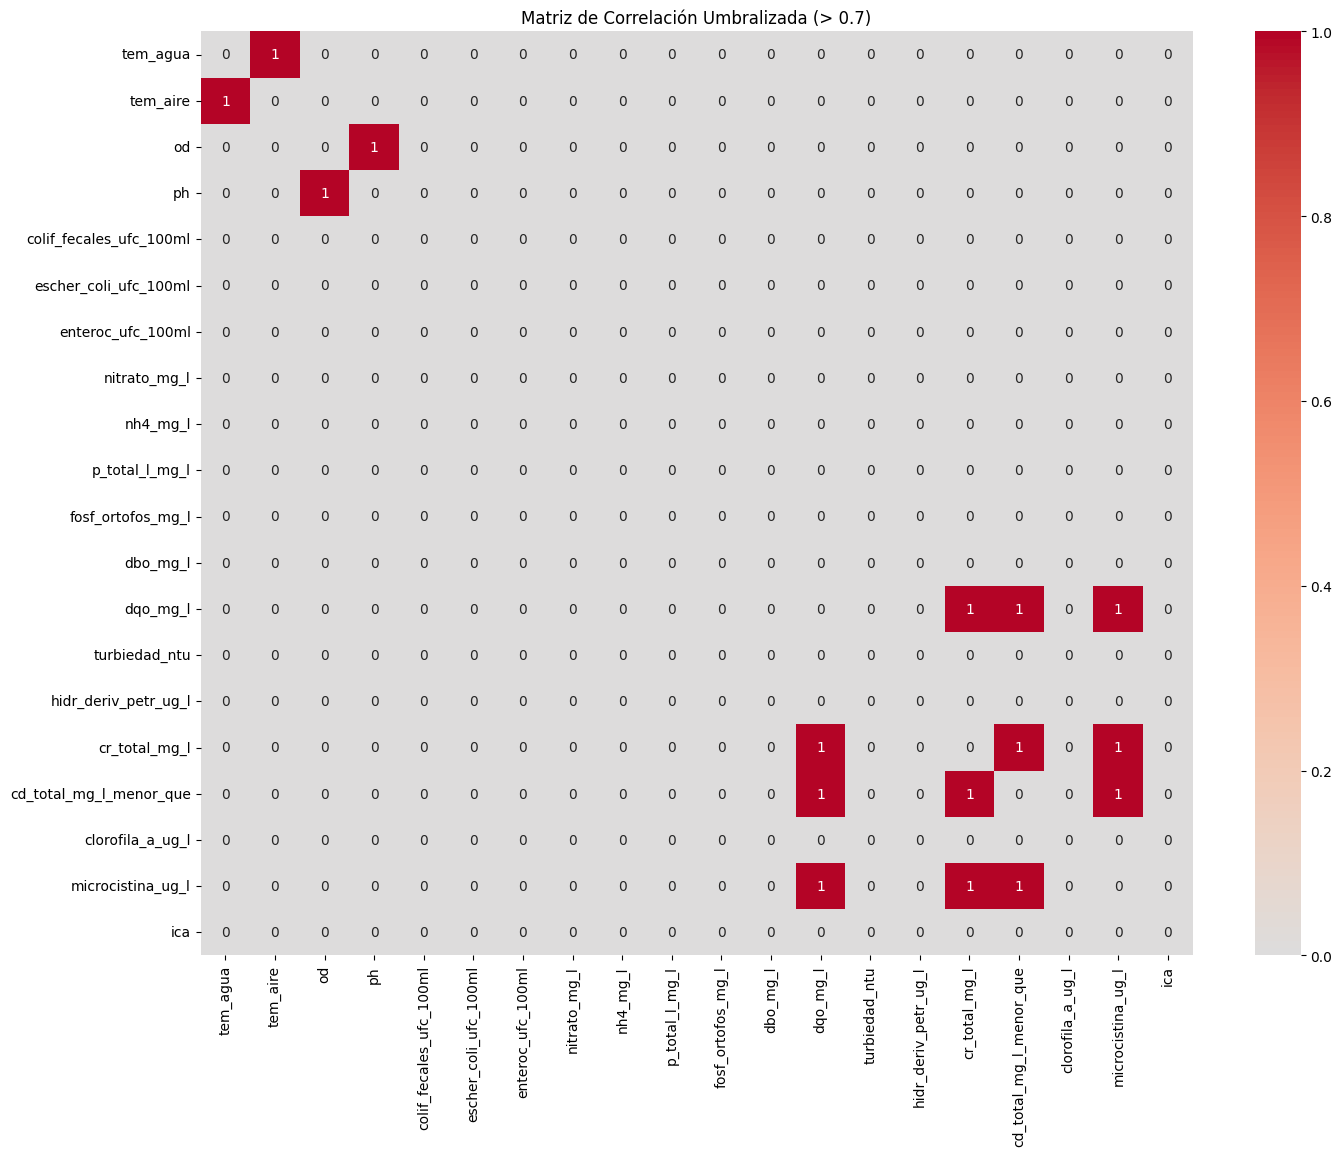

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculamos las correlaciones entre las variables cuantitativas
variables_cuantitativas = preprocessed_dataset.drop(['sitios','campaña','olores','color','espumas','mat_susp','calidad_de_agua'], axis=1)
correlation_matrix = variables_cuantitativas.corr()

# Tomamos el valor absoluto de las correlaciones y aplicamos un umbral mayor a 0.7
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.7

# Eliminamos la diagonal de la matriz (relación de una variable consigo misma)
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# Configuración del tamaño del gráfico
plt.figure(figsize=(16, 12))

# Creamos el heatmap con la matriz de correlación umbralizada
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap='coolwarm')

# Título del gráfico
plt.title('Matriz de Correlación Umbralizada (> 0.7)')

# Mostramos el gráfico
plt.show()


---

#### Visualización con Scatter Plots

En esta sección, exploramos las relaciones entre las variables que tienen una correlación alta, utilizando **gráficos de dispersión**. El objetivo es visualizar cómo se comportan las parejas de variables con correlaciones mayores a 0.7, lo que puede ser útil para entender mejor su relación y para la selección de características en modelos predictivos.

##### 1. Filtrar y Visualizar Correlaciones Fuertes

Para cada par de variables con una correlación superior al umbral de 0.7, vamos a generar un **gráfico de dispersión**. Esto nos permitirá visualizar si la relación entre las dos variables es lineal o si existe alguna tendencia clara entre ellas.

El siguiente código recorre la matriz de correlación umbralizada para identificar las correlaciones altas y luego genera los gráficos de dispersión para cada par de variables correlacionadas:


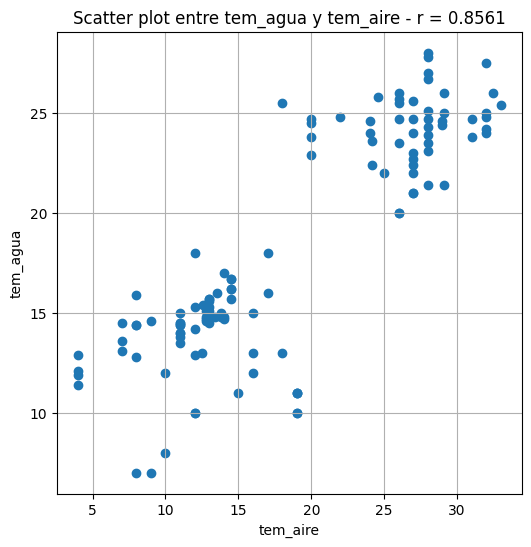

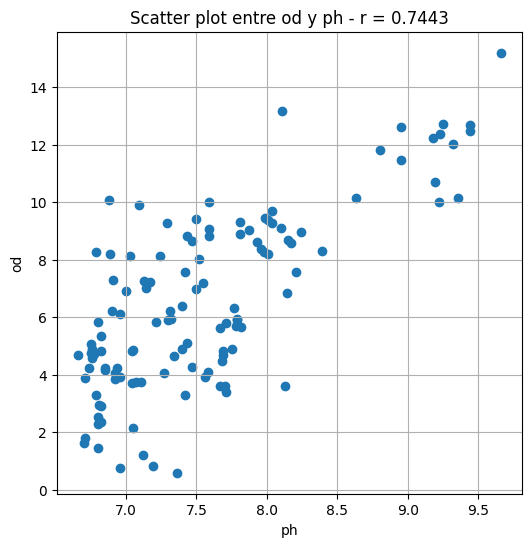

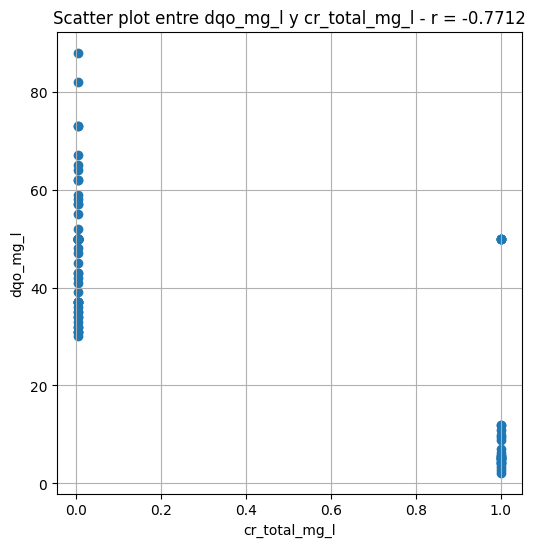

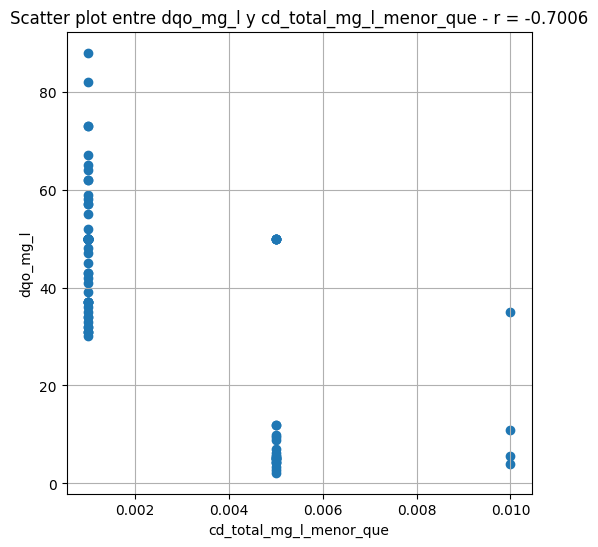

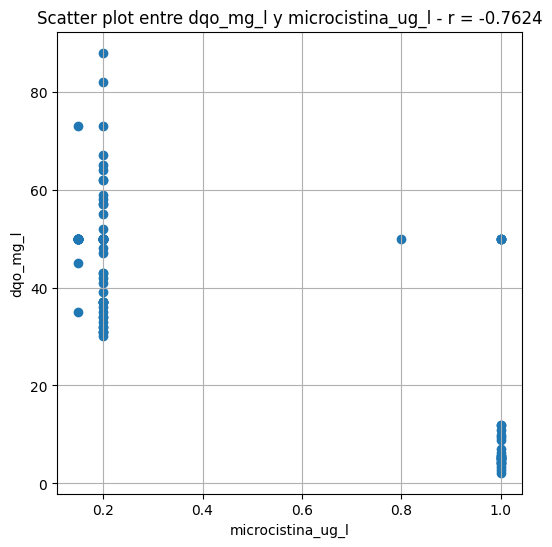

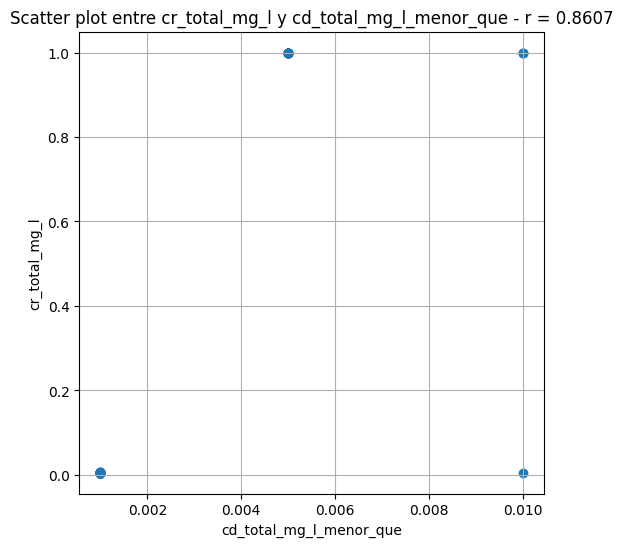

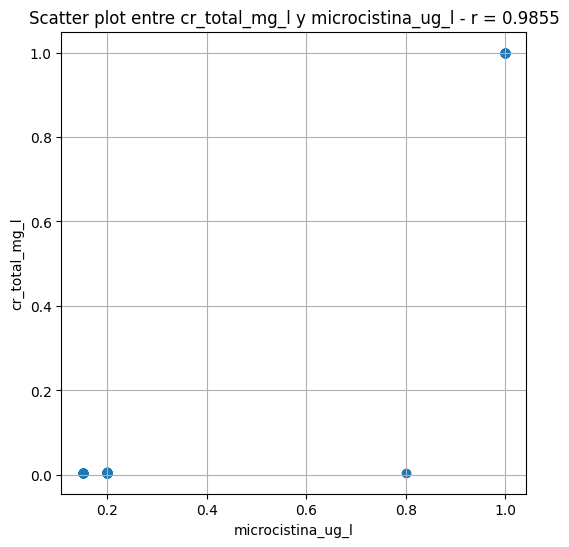

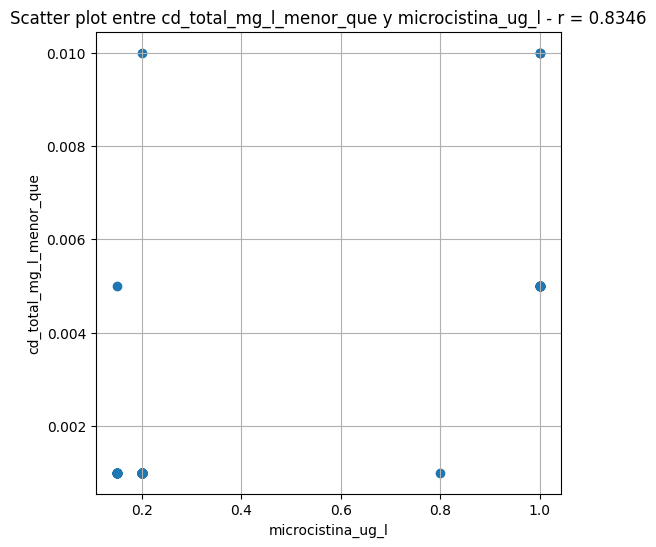

In [254]:
# Iteramos por cada columna y fila de la matriz de correlación umbralizada
for i, col in enumerate(correlation_matrix_umbralizada.columns): 
    # Iteramos por las filas correspondientes a cada columna
    for j in range(i, len(correlation_matrix_umbralizada.index)):
        # Extraemos el nombre de la fila
        row = correlation_matrix_umbralizada.index[j]
        
        # Si la correlación es alta (mayor a 0.7)
        if correlation_matrix_umbralizada.loc[row, col]:
        
            # Extraemos el valor de la correlación entre las variables
            correlation = correlation_matrix.loc[row, col]
            
            # Creamos un gráfico de dispersión
            plt.figure(figsize=(6, 6))
            plt.scatter(preprocessed_dataset[row], preprocessed_dataset[col])
            
            # Añadimos título y etiquetas al gráfico
            plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
            plt.xlabel(row)
            plt.ylabel(col)
            plt.grid(True)
            
            # Mostramos el gráfico
            plt.show()

---
#### Generación de Reporte de Perfil de Datos

En esta sección, utilizamos la librería `ydata_profiling` para generar un reporte completo de perfil de los datos preprocesados. Este reporte incluye estadísticas descriptivas, distribución de las variables, correlaciones, valores faltantes, y otras métricas útiles para comprender mejor el conjunto de datos.

##### 1. Generación del Reporte Interactivo

El reporte será generado automáticamente y guardado en un archivo HTML. Este archivo se puede abrir para explorar los resultados de manera interactiva. Si el archivo ya ha sido creado previamente, el script lo detectará y no generará el reporte de nuevo.

El código a continuación realiza lo siguiente:

- **Verifica si el archivo de reporte ya existe**.
- **Genera el reporte de perfil** utilizando `ydata_profiling.ProfileReport`.
- **Guarda el reporte como un archivo HTML**.
- **Abre el archivo HTML en el navegador** para facilitar su visualización.

In [255]:
import webbrowser
from pathlib import Path
from ydata_profiling import ProfileReport

# Verificamos si el archivo ya existe
nombre = "calidad_del_agua_report.html"
if not Path(nombre).exists():
    try:
        # Generamos el reporte
        report = ProfileReport(preprocessed_dataset)
        
        # Guardamos el reporte como un archivo HTML
        report.to_file(output_file=nombre)
        print(f"Reporte generado y guardado como {nombre}.")
    except Exception as e:
        print(f"Ocurrió un error al generar el reporte: {e}")
else:
    print("El archivo ya está creado.")

# Abrir el archivo HTML en el navegador
webbrowser.open(nombre)


El archivo ya está creado.


True

#### Normalización de Datos

En esta sección, realizaremos la **normalización** de las columnas numéricas de nuestro conjunto de datos. La normalización es una técnica de preprocesamiento de datos que escala las características numéricas a un rango definido, en este caso, entre 0 y 1. Esto es útil para algoritmos que dependen de la magnitud de las variables, como la regresión lineal, las redes neuronales o los algoritmos basados en distancias como K-Vecinos.

Para llevar a cabo la normalización, utilizaremos el **MinMaxScaler** de la librería `sklearn`, que ajusta cada característica al rango [0, 1].

##### Pasos realizados:

1. **Selección de las columnas numéricas**: Primero, seleccionamos las columnas del conjunto de datos que contienen valores numéricos.
2. **Aplicación del MinMaxScaler**: Creamos un objeto `MinMaxScaler` y lo aplicamos a las columnas numéricas seleccionadas.
3. **Transformación de los datos**: Los valores numéricos se ajustan al rango [0, 1] utilizando el `fit_transform` del scaler.

In [256]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas numéricas para la normalización
numeric_cols = preprocessed_dataset.select_dtypes(include=np.number).columns

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

preprocessed_dataset_scaler = preprocessed_dataset.copy()
# Ajustamos el scaler a los datos y transformamos los datos
preprocessed_dataset_scaler[numeric_cols] = scaler.fit_transform(preprocessed_dataset[numeric_cols])

##### Análisis de Clustering con KMeans

En esta sección, aplicaremos el algoritmo de **KMeans** para realizar un análisis de clustering en nuestro conjunto de datos. El objetivo de esta técnica es agrupar las muestras en diferentes clusters (grupos) basados en sus características similares. Utilizamos **KMeans** para encontrar automáticamente estos grupos, de manera que las muestras dentro de un mismo grupo sean más similares entre sí que con las de otros grupos.

In [257]:
from sklearn.cluster import KMeans

nro_cluster = 3

# separamos las features de los nombres de los países
preprocessed_dataset_scaler = preprocessed_dataset_scaler.dropna()
sitios = preprocessed_dataset_scaler['sitios']
features_sitios = preprocessed_dataset_scaler.drop(columns=['sitios','campaña','olores','color','espumas','mat_susp','calidad_de_agua'])

# inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=nro_cluster, verbose=0, random_state=10)
# lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(features_sitios)
# y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans = kmeans.predict(features_sitios)

##### Asignación de Sitios a los Clusters

En esta sección, asignamos los sitios a sus respectivos clusters, utilizando el resultado del análisis de KMeans. Creamos un **DataFrame** que contiene los nombres de los sitios junto con el cluster al que pertenecen.

Luego, imprimimos los sitios agrupados por cada uno de los clusters generados por el modelo KMeans.



In [258]:
import pandas as pd

# Creamos un DataFrame con los países y los clusters asignados
cluster_df = pd.DataFrame({'Sitios': sitios, 'Cluster': clusters_kmeans})

# Imprimimos los países de cada cluster
for cluster_num in range(nro_cluster):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Sitios'].tolist())


Cluster 0:
['Canal Villanueva y Río Luján', 'Río Lujan y Arroyo Caraguatá', 'Río Capitán y Río San Antonio', 'Del Arca', 'Reserva Ecológica', 'Reserva Barrio El Ceibo ', 'Costa de Villa Domínico     ', 'Arroyo Santo Domingo', 'Náutico 400 m', 'Pejerrey Club 400 m', 'Calle 14 y Costa - Salida cloaca', 'Costanera Hudson Calle 63', 'Camping Eva Perón', 'Toma de agua Club de Pesca', 'Arroyo El Gato', 'Ensenada Prefectura Isla Santiago', 'Balneario Palo Blanco', 'Balneario Municipal', 'Playa La Balandra', 'Playa La Balandra', 'Playa La Balandra']

Cluster 1:
['Canal Villanueva y Río Luján', 'Canal Villanueva y Río Luján', 'Río Lujan y Arroyo Caraguatá', 'Canal Aliviador y Río Lujan', 'Río Carapachay y Arroyo Gallo Fiambre', 'Río Carapachay y Arroyo Gallo Fiambre', 'Río Reconquista y Río Lujan', 'Río Reconquista y Río Lujan', 'Río Capitán y Río San Antonio', 'Río Capitán y Río San Antonio', 'Arroyo Abra Vieja y Santa Rosa', 'Arroyo Abra Vieja y Santa Rosa', 'Del Arca', 'Reserva Ecológica', 

#### Visualización de Clusters con t-SNE

En esta sección, reduciremos la dimensionalidad de los datos a 2 dimensiones utilizando **t-SNE** (t-distributed Stochastic Neighbor Embedding), una técnica comúnmente utilizada para la visualización de datos de alta dimensión. Esto nos permitirá ver cómo se distribuyen los diferentes **clusters** generados por el algoritmo **KMeans** en un espacio bidimensional.

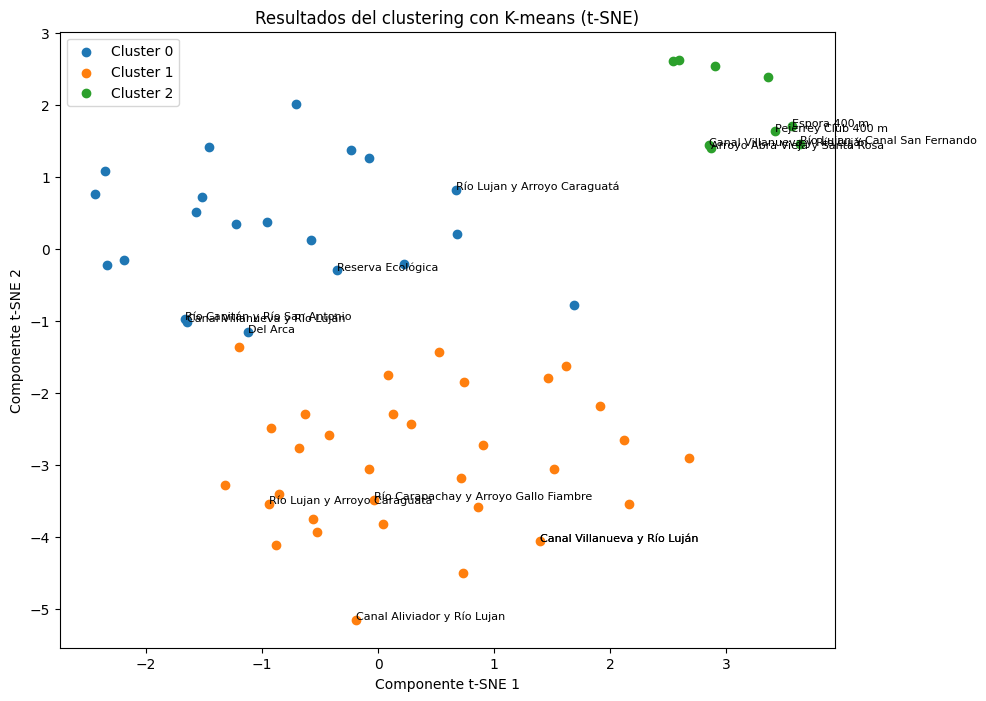

In [259]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_sitios)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans, 'Country': sitios})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(nro_cluster):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar 5 países para etiquetar en cada cluster, incluyendo Argentina si está presente
  countries_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Country'].tolist()
  if 'Argentina' in countries_to_label:
    countries_to_label.remove('Argentina')
    countries_to_label = ['Argentina'] + countries_to_label[:4]
  else:
    countries_to_label = countries_to_label[:5]

  for country in countries_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Country'] == country)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], country, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

##### Método del Codo para Selección del Número de Clusters

En esta sección, utilizamos el **método del codo** para determinar el número óptimo de clusters para el algoritmo **KMeans**. Este método evalúa la suma de los cuadrados dentro de los clusters (**WCSS**, por sus siglas en inglés: Within-Cluster Sum of Squares) para diferentes números de clusters. El número de clusters óptimo se selecciona observando el punto donde la disminución de **WCSS** empieza a ser más pequeña (el "codo").

Gracias a esto, decidimos utilizar 3 cluster

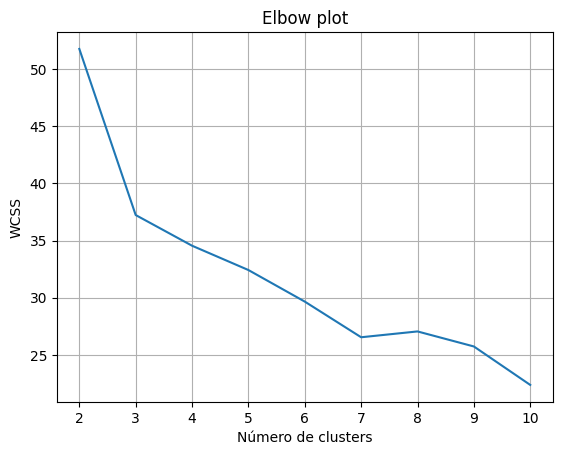

In [260]:
from sklearn.cluster import KMeans

# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(features_sitios)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

# Hipótesis
### Hipótesis: Si hay más olor, entonces hay mayor contaminación por heces fecales.

En este análisis, vamos a ver si existe alguna relación entre la **presencia de olor** y la **contaminación fecal**. Para ello, comparamos las concentraciones de tres indicadores de contaminación (enterococos, coliformes fecales y Escherichia coli) en dos grupos:

- Sitios con **olor**.
- Sitios **sin olor**.

Usamos **boxplots** para visualizar cómo se distribuyen los valores de estos indicadores en ambos grupos. 

### Variables Analizadas

Vamos a analizar tres columnas de datos:

1. **Enterococos** (`enteroc_ufc_100ml`).
2. **Coliformes fecales** (`colif_fecales_ufc_100ml`).
3. **Escherichia coli** (`escher_coli_ufc_100ml`).

A continuación, se muestran los gráficos de caja para cada uno de estos indicadores, divididos en sitios con y sin olor.

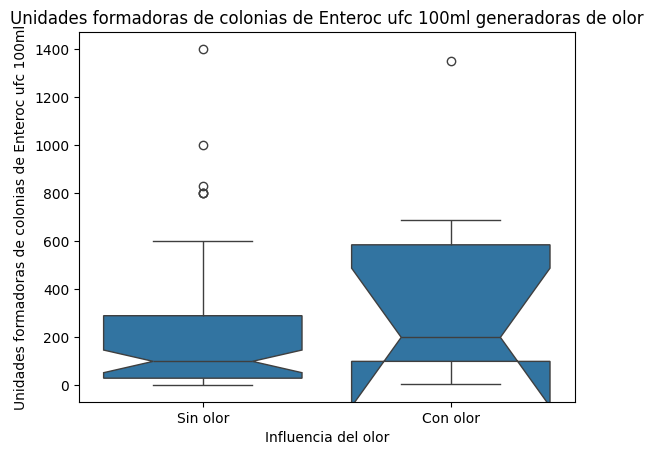

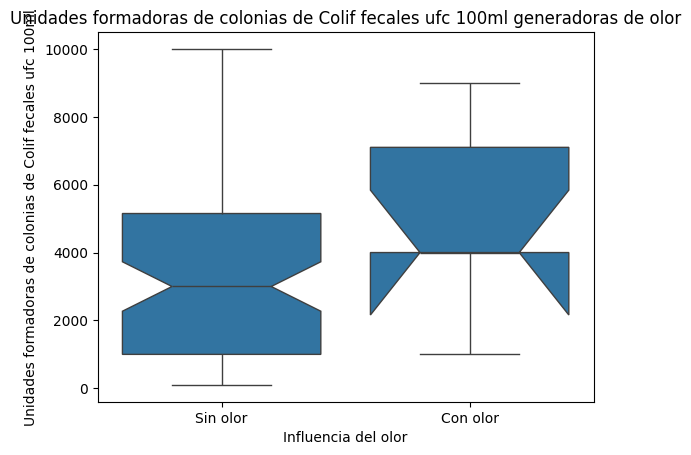

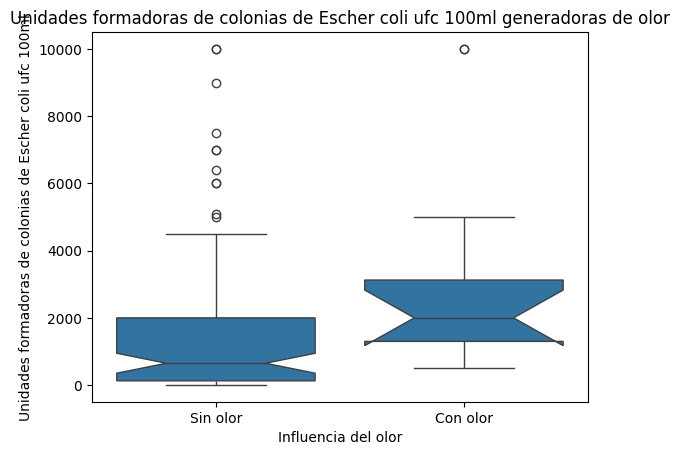

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas a analizar
col = ['enteroc_ufc_100ml', 'colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml']

# Loop para generar un boxplot para cada columna en la lista 'col'
for j in col:
    # Crear el boxplot para cada variable, usando 'olores' como variable de agrupación
    sns.boxplot(x='olores', y=j, data=preprocessed_dataset, notch=True)
    
    # Configuración de título y etiquetas del gráfico
    plt.title(f"Unidades formadoras de colonias de {j.replace('_', ' ').capitalize()} generadoras de olor")
    plt.xlabel("Influencia del olor")
    plt.xticks(ticks=[0, 1], labels=["Sin olor", "Con olor"])
    plt.ylabel(f"Unidades formadoras de colonias de {j.replace('_', ' ').capitalize()}")
    
    # Mostrar el gráfico
    plt.show()


##### Análisis de Normalidad de los Datos de Contaminación Fecal

En esta sección, realizamos un **análisis de normalidad** sobre los datos de **contaminación fecal** (enterococos, coliformes fecales y Escherichia coli) para sitios con y sin **olor**. Para ello, utilizamos el **test de Shapiro-Wilk**, que nos ayuda a determinar si los datos siguen una distribución normal.

A continuación, aplicamos el test de Shapiro-Wilk a los tres indicadores de contaminación fecal en los sitios con y sin olor:

In [262]:
from scipy.stats import shapiro

# Separamos los datos en dos grupos, sitios con olor y sitios sin olores
con_olor = preprocessed_dataset[preprocessed_dataset['olores'] == True]
sin_olor = preprocessed_dataset[preprocessed_dataset['olores'] == False]

con_olor = con_olor.dropna()
sin_olor = sin_olor.dropna()
for j in col:
    # Test de Shapiro-Wilk para sitios con olor
    stat, p = shapiro(con_olor[j])
    print(f"\n columna {j}")
    print(f"Test de Shapiro-Wilk para datos con olores: Estadístico={stat:.3f}, p-valor={p:.3f}")

    # Test de Shapiro-Wilk para sitios sin olores
    stat, p = shapiro(sin_olor[j])
    print(f"Test de Shapiro-Wilk para sitios sin olores: Estadístico={stat:.3f}, p-valor={p:.3f}")


 columna enteroc_ufc_100ml
Test de Shapiro-Wilk para datos con olores: Estadístico=0.665, p-valor=0.004
Test de Shapiro-Wilk para sitios sin olores: Estadístico=0.811, p-valor=0.000

 columna colif_fecales_ufc_100ml
Test de Shapiro-Wilk para datos con olores: Estadístico=0.969, p-valor=0.866
Test de Shapiro-Wilk para sitios sin olores: Estadístico=0.870, p-valor=0.000

 columna escher_coli_ufc_100ml
Test de Shapiro-Wilk para datos con olores: Estadístico=0.906, p-valor=0.441
Test de Shapiro-Wilk para sitios sin olores: Estadístico=0.763, p-valor=0.000


En esta sección, utilizamos el **test de Kolmogorov-Smirnov** para evaluar si los datos de **contaminación fecal** (enterococos, coliformes fecales y Escherichia coli) de los sitios con y sin **olor** siguen una distribución normal.

El **test de Kolmogorov-Smirnov (KS)** compara una muestra con una distribución teórica (en este caso, una distribución normal) y nos indica si los datos se ajustan o no a esa distribución. Si el **p-valor** es menor a 0.05, rechazamos la hipótesis nula de que los datos siguen una distribución normal.

In [263]:
from scipy.stats import kstest

for j in col:
    print(f"columna {j}")
    # Test de Kolmogorov-Smirnov para sitios cons olores
    stat, p = kstest(con_olor[j], 'norm')
    print(f"Test de Kolmogorov-Smirnov para sitios con olores: Estadístico={stat:.3f}, p-valor={p:.3f}")

    # Test de Kolmogorov-Smirnov para sitios sin olores
    stat, p = kstest(sin_olor[j], 'norm')
    print(f"Test de Kolmogorov-Smirnov para sitios sin olores: Estadístico={stat:.3f}, p-valor={p:.3f} \n ")

columna enteroc_ufc_100ml
Test de Kolmogorov-Smirnov para sitios con olores: Estadístico=1.000, p-valor=0.000
Test de Kolmogorov-Smirnov para sitios sin olores: Estadístico=0.982, p-valor=0.000 
 
columna colif_fecales_ufc_100ml
Test de Kolmogorov-Smirnov para sitios con olores: Estadístico=1.000, p-valor=0.000
Test de Kolmogorov-Smirnov para sitios sin olores: Estadístico=1.000, p-valor=0.000 
 
columna escher_coli_ufc_100ml
Test de Kolmogorov-Smirnov para sitios con olores: Estadístico=1.000, p-valor=0.000
Test de Kolmogorov-Smirnov para sitios sin olores: Estadístico=1.000, p-valor=0.000 
 


Nuevamente vemos que se rechaza la hipótesis nula de normalidad, por lo que a las claras se trata de datos que no siguen una distribución normal.


Como los resultados de las pruebas indicaron que los datos no siguen una distribución normal (p-valores menores al nivel de confianza de 0.05), no podemos aplicar un **test t** para comparar los grupos con y sin olor, ya que este test asume que los datos son normales.

En lugar de eso, evaluaremos la **homocedasticidad** entre los dos grupos para determinar si podemos aplicar el **test de Mann-Whitney**, que es una prueba no paramétrica adecuada para comparar dos grupos cuando no se cumplen los supuestos de normalidad o homogeneidad de varianzas.

In [264]:
import scipy.stats as stats

# Inicializamos dos listas separadas para columnas homocedásticas y no homocedásticas
homo = []
no_homo = []

# Iteramos sobre las columnas
for j in col:
    # Test de Levene para comparar homocedasticidad
    stat, p = stats.levene(sin_olor[j], con_olor[j])
    print(f"Test de Levene para {j}: Estadístico={stat:.3f}, p-valor={p:.3f}")
    
    # Si el p-valor es mayor a 0.05, es homocedástico
    if p > 0.05:
        homo.append(j)
        print('Es homocedástico')
    else:
        no_homo.append(j)
        print('No es homocedástico')

Test de Levene para enteroc_ufc_100ml: Estadístico=5.902, p-valor=0.018
No es homocedástico
Test de Levene para colif_fecales_ufc_100ml: Estadístico=0.023, p-valor=0.880
Es homocedástico
Test de Levene para escher_coli_ufc_100ml: Estadístico=0.040, p-valor=0.842
Es homocedástico


Nuestro test indica que efectivamente nuestros datos son homocedasticos, con lo que podemos avanzar y usar un test que todavía no probamos... el de Mann Whitney!
##### Validamos la hipótesis con Mann Whitney U
Como nuestro conjunto ahora no cumple normalidad pero sí homocedasticidad, podemos recurrir al test de Mann Whitney U para evaluar la significancia estadística de las diferencias entre ambos grupos

In [265]:
from scipy.stats import mannwhitneyu

for j in homo:
    print(f"\nTest para {j}")
    
    # Test de Mann-Whitney U para comparar Population_mln entre sitios con olor y sin olor
    stat, p = stats.mannwhitneyu(con_olor[j], sin_olor[j])
    print(f"Test de Mann-Whitney U para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

    # Interpretación de los resultados
    alpha = 0.05  # Nivel de significancia
    if p > alpha:
        print("No hay suficiente evidencia para rechazar la hipótesis nula.")
        print("No hay una diferencia significativa en la población entre sitios con olor y sin olor.")
    else:
        print("Se rechaza la hipótesis nula.")
        print("Existe una diferencia significativa en la población  entre sitios con olor y sin olor.")


Test para colif_fecales_ufc_100ml
Test de Mann-Whitney U para Population_mln: Estadístico=198.000, p-valor=0.154
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la población entre sitios con olor y sin olor.

Test para escher_coli_ufc_100ml
Test de Mann-Whitney U para Population_mln: Estadístico=227.000, p-valor=0.029
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la población  entre sitios con olor y sin olor.


#### Resultados del Test de Mann-Whitney

Después de realizar el **test de Mann-Whitney** para comparar la población de unidades formadoras de colonias de enterococos entre los sitios **con olor** y los sitios **sin olor**
### Conclusión
- Dado que el **p-valor** es mayor que 0.05, podemos concluir que no existe evidencia suficiente para afirmar que la presencia de olor esté asociada con una mayor o menor contaminación por enterococos en los sitios evaluados.
- **Cierre de la Hipótesis**: La hipótesis que planteaba que la presencia de olor en los sitios indica una mayor contaminación por heces fecales (reflejada en la población de enterococos) **no ha sido confirmada** por los datos.
---



In [266]:
for j in no_homo:
    print(f"\nTest para {j}")
    # Test de Kruskal-Wallis para comparar colif_fecales_ufc_100ml entre lugares con y sin olor
    stat, p = stats.kruskal(con_olor[j], sin_olor[j])
    print(f"Test de Kruskal-Wallis para {j}: Estadístico={stat:.3f}, p-valor={p:.3f}")

    # Interpretación de los resultados
    alpha = 0.05  # Nivel de significancia
    if p > alpha:
        print("No hay suficiente evidencia para rechazar la hipótesis nula.")
        print(f"No hay una diferencia significativa en el {j} entre lugares con ica alto y lugares con ica bajo.")
    else:
        print("Se rechaza la hipótesis nula.")
        print(f"Existe una diferencia significativa en el {j} entre lugares con ica alto y lugares con ica bajor")


Test para enteroc_ufc_100ml
Test de Kruskal-Wallis para enteroc_ufc_100ml: Estadístico=0.508, p-valor=0.476
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en el enteroc_ufc_100ml entre lugares con ica alto y lugares con ica bajo.


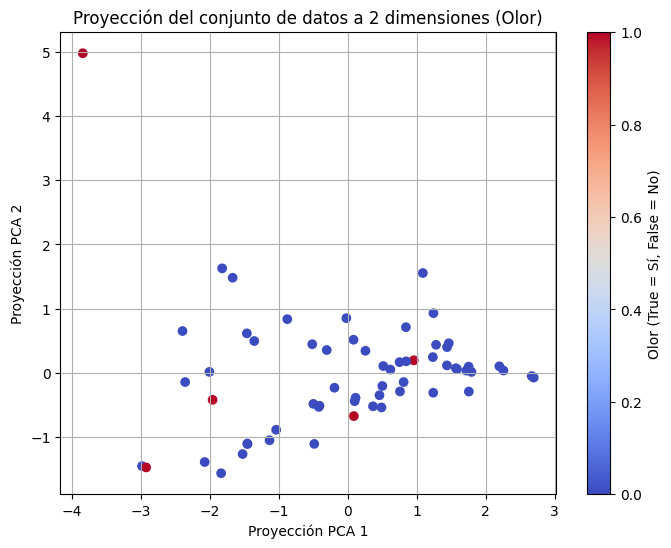

In [267]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Eliminar filas con valores nulos
preprocessed_dataset = preprocessed_dataset.dropna()

# Eliminar columnas no relevantes para el PCA
X = preprocessed_dataset.drop([
    'sitios', 'campaña', 'olores', 'color', 'espumas', 'mat_susp', 'calidad_de_agua', 
    'tem_agua', 'tem_aire', 'od', 'ph', 'nitrato_mg_l', 'nh4_mg_l', 'p_total_l_mg_l', 
    'fosf_ortofos_mg_l', 'turbiedad_ntu', 'hidr_deriv_petr_ug_l', 'cr_total_mg_l', 
    'cd_total_mg_l_menor_que', 'clorofila_a_ug_l', 'microcistina_ug_l', 'dbo_mg_l', 'dqo_mg_l'], axis=1)

# Estandarizar las características (normalizar)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar el PCA con 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar la proyección en 2 dimensiones
plt.figure(figsize=(8, 6))

# Graficar los puntos con colores según la columna 'olores' (True/False)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=preprocessed_dataset['olores'], cmap='coolwarm')

# Añadir etiquetas y título
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones (Olor)')

# Barra de colores para mostrar los valores de 'olores' (True = Sí, False = No)
plt.colorbar(label='Olor (True = Sí, False = No)')

# Mostrar el gráfico
plt.show()


In [268]:
pca.explained_variance_ratio_

array([0.56921677, 0.22661305])

---
### Hipotesis 2. La contaminación por heces fecales son un gran causante de deterioro en la calidad del agua


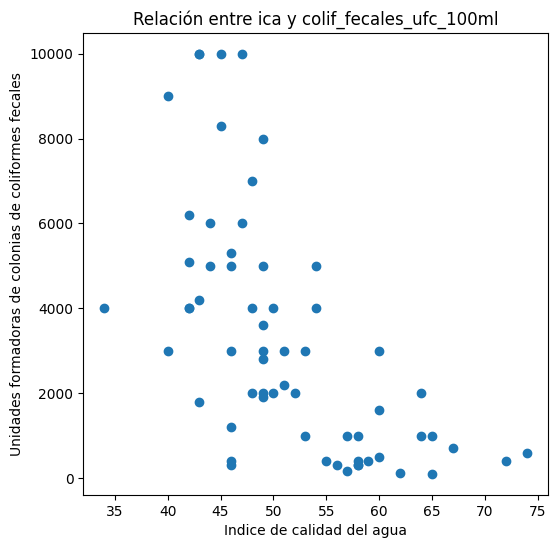

In [269]:
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(preprocessed_dataset["ica"], preprocessed_dataset["colif_fecales_ufc_100ml"])

# Agregar etiquetas a los ejes
plt.xlabel("Indice de calidad del agua")
plt.ylabel("Unidades formadoras de colonias de coliformes fecales")

# Agregar un título al gráfico
plt.title("Relación entre ica y colif_fecales_ufc_100ml")

# Mostrar el gráfico
plt.show()

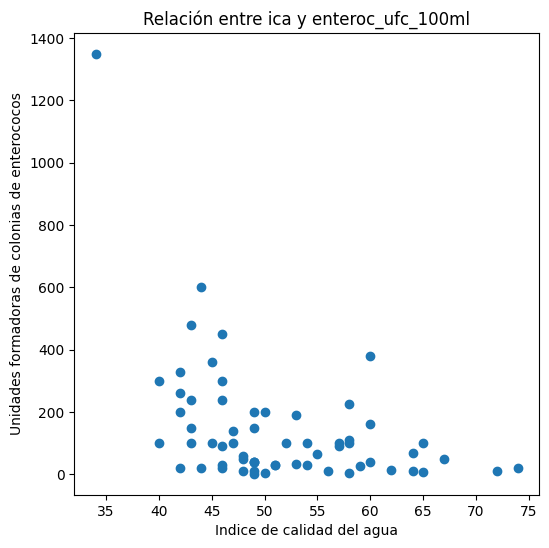

In [270]:
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(preprocessed_dataset["ica"], preprocessed_dataset["enteroc_ufc_100ml"])

# Agregar etiquetas a los ejes
plt.xlabel("Indice de calidad del agua")
plt.ylabel("Unidades formadoras de colonias de enterococos")

# Agregar un título al gráfico
plt.title("Relación entre ica y enteroc_ufc_100ml")

# Mostrar el gráfico
plt.show()

Vamos a probar la hipotesis con algun test, primero para los enterococos.

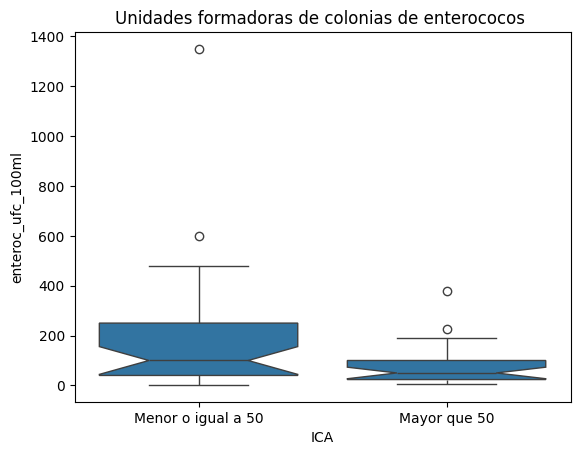

In [271]:
# Box-plot para ver la diferencia en las unidades formadoras de enterococos entre los sitios donde tienen un ica mayor a 50 o menor igual

umbral = 50
preprocessed_dataset['grupo'] = preprocessed_dataset['ica'].apply(lambda x: 'Mayor que {}'.format(umbral) if x > umbral else 'Menor o igual a {}'.format(umbral))

sns.boxplot(x='grupo', y='enteroc_ufc_100ml', data=preprocessed_dataset, notch=True)
plt.title("Unidades formadoras de colonias de enterococos ")
plt.xlabel("ICA")
plt.show()

Es bastante notorio que no son normales pero de todas formas vamos a probarlo con un test de Shapiro


In [272]:

# Separamos los datos en dos grupos, ica bajo(menor o igual a 50) e ica alto (mayor a 50)
ica_bajo = preprocessed_dataset[preprocessed_dataset['ica'] <= 50]['enteroc_ufc_100ml']
ica_alto = preprocessed_dataset[preprocessed_dataset['ica'] > 50]['enteroc_ufc_100ml']

ica_bajo=ica_bajo.dropna()
ica_alto=ica_alto.dropna()
#Analizamos normalidad
# Test de Shapiro-Wilk para datos con olor
stat, p = shapiro(ica_bajo)
print(f"Test de Shapiro-Wilk para datos con ica bajo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(ica_alto)
print(f"Test de Shapiro-Wilk para datos con ica alto: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para datos con ica bajo: Estadístico=0.677, p-valor=0.000
Test de Shapiro-Wilk para datos con ica alto: Estadístico=0.775, p-valor=0.000


No es normal

In [273]:
# Test de Levene para comparar homocedasticidad
stat, p = stats.levene(ica_alto, ica_bajo)
print(f"Test de Levene para enteroc_ufc_100ml: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para enteroc_ufc_100ml: Estadístico=4.371, p-valor=0.041


No son homocedasticos

In [274]:
# Test de Kruskal-Wallis para comparar enteroc_ufc_100ml entre lugares con y sin olor
stat, p = stats.kruskal(ica_alto, ica_bajo)
print(f"Test de Kruskal-Wallis para enteroc_ufc_100ml: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el enteroc_ufc_100ml entre lugares con ica alto y lugares con ica bajo.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el {enteroc_ufc_100ml} entre lugares con ica alto y lugares con ica bajor")

Test de Kruskal-Wallis para enteroc_ufc_100ml: Estadístico=5.055, p-valor=0.025
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el {enteroc_ufc_100ml} entre lugares con ica alto y lugares con ica bajor


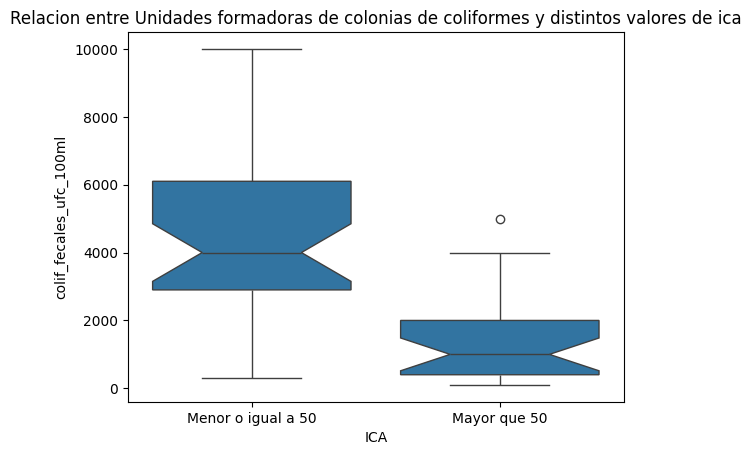

In [275]:
# Box-plot para ver la diferencia en las unidades formadoras de enterococos entre los sitios donde tienen un ica mayor a 50 o menor igual

umbral = 50
preprocessed_dataset['grupo'] = preprocessed_dataset['ica'].apply(lambda x: 'Mayor que {}'.format(umbral) if x > umbral else 'Menor o igual a {}'.format(umbral))

sns.boxplot(x='grupo', y='colif_fecales_ufc_100ml', data=preprocessed_dataset, notch=True)
plt.title("Relacion entre Unidades formadoras de colonias de coliformes y distintos valores de ica")
plt.xlabel("ICA")
plt.show()

In [276]:
# Separamos los datos en dos grupos, ica bajo(menor o igual a 50) e ica alto (mayor a 50)
ica_bajo_c = preprocessed_dataset[preprocessed_dataset['ica'] <= 50]['colif_fecales_ufc_100ml']
ica_alto_c = preprocessed_dataset[preprocessed_dataset['ica'] > 50]['colif_fecales_ufc_100ml']

ica_bajo_c=ica_bajo_c.dropna()
ica_alto_c=ica_alto_c.dropna()
#Analizamos normalidad
# Test de Shapiro-Wilk para datos con olor
stat, p = shapiro(ica_bajo_c)
print(f"Test de Shapiro-Wilk para datos con ica bajo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(ica_alto_c)
print(f"Test de Shapiro-Wilk para datos con ica alto: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para datos con ica bajo: Estadístico=0.935, p-valor=0.040
Test de Shapiro-Wilk para datos con ica alto: Estadístico=0.824, p-valor=0.000


No son normales

In [277]:
# Test de Levene para comparar homocedasticidad
stat, p = stats.levene(ica_alto_c, ica_bajo_c)
print(f"Test de Levene para colif_fecales_ufc_100ml : Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para colif_fecales_ufc_100ml : Estadístico=10.214, p-valor=0.002


No son homocedasticos

In [278]:
# Test de Kruskal-Wallis para comparar colif_fecales_ufc_100ml entre lugares con y sin olor
stat, p = stats.kruskal(ica_alto_c, ica_bajo_c)
print(f"Test de Kruskal-Wallis para colif_fecales_ufc_100ml: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el colif_fecales_ufc_100ml entre lugares con ica alto y lugares con ica bajo.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el colif_fecales_ufc_100ml entre lugares con ica alto y lugares con ica bajor")

Test de Kruskal-Wallis para colif_fecales_ufc_100ml: Estadístico=25.866, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en el colif_fecales_ufc_100ml entre lugares con ica alto y lugares con ica bajor


---
## Hipotesis 3
### Los sectores más afectados por la contaminación son aquellos en los que la interacción humana es más intensa.

In [279]:
# inicializamos un contador
sitios = 0
# creamos una lista para guardar los valores únicos
unique_values = []
# iteramos sobre los valores de la columna
for val in preprocessed_dataset["sitios"]:
  # si el valor incluye "Data Scientist"
  if "Playa" in val or "cloaca" in val  or "Balneario" in val or "Pesca" in val or "Club" in val or "Puerto" in val or "Camping" in val or "Costanera" in val or "Costanera" in val:
    # incrementamos el contador
    sitios += 1
    # si el valor no esta en la lista de valores únicos
    if val not in unique_values:
      # lo agregamos
      unique_values.append(val)

# imprimimos el contador y la lista de valores únicos
print("Cantidad de valores que incluyen 'Playa' o  cloaca:", sitios)
print("Valores únicos:", unique_values)
unique_values

Cantidad de valores que incluyen 'Playa' o  cloaca: 21
Valores únicos: ['Playa Espigón de Pacheco', 'Pejerrey Club 400 m', 'Calle 14 y Costa - Salida cloaca', 'Costanera Hudson Calle 63', 'Camping Eva Perón', 'Toma de agua Club de Pesca', 'Balneario Palo Blanco', 'Balneario Municipal', 'Playa La Balandra']


['Playa Espigón de Pacheco',
 'Pejerrey Club 400 m',
 'Calle 14 y Costa - Salida cloaca',
 'Costanera Hudson Calle 63',
 'Camping Eva Perón',
 'Toma de agua Club de Pesca',
 'Balneario Palo Blanco',
 'Balneario Municipal',
 'Playa La Balandra']

In [280]:
datos_con_contactos = preprocessed_dataset[preprocessed_dataset['sitios'].isin(unique_values)]
datos_sin_contactos = preprocessed_dataset[~preprocessed_dataset['sitios'].isin(unique_values)]

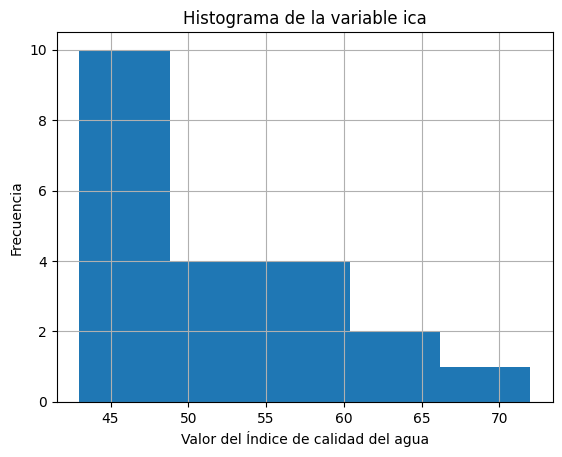

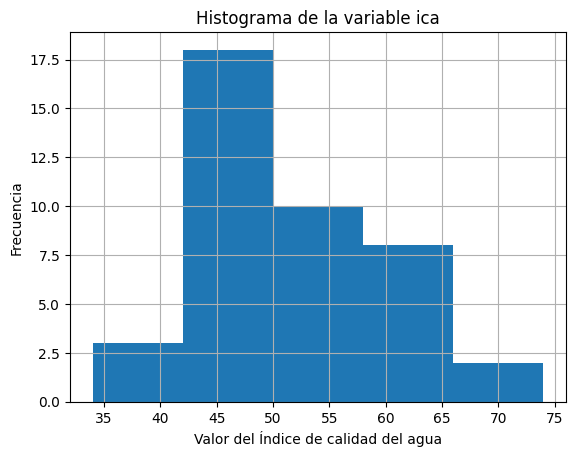

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el boxplot para cada variable, usando 'olores' como variable de agrupación
# Crear el histograma
datos_con_contactos["ica"].hist(bins=5)

# Agregar etiquetas a los ejes
plt.xlabel("Valor del Índice de calidad del agua")
plt.ylabel("Frecuencia")

# Agregar un título al gráfico
plt.title("Histograma de la variable ica")

# Mostrar el gráfico
plt.show()

datos_sin_contactos["ica"].hist(bins=5)

# Agregar etiquetas a los ejes
plt.xlabel("Valor del Índice de calidad del agua")
plt.ylabel("Frecuencia")

# Agregar un título al gráfico
plt.title("Histograma de la variable ica")

# Mostrar el gráfico
plt.show()

In [282]:
from scipy.stats import shapiro

# Test de Shapiro-Wilk para sitios con olor
stat, p = shapiro(datos_con_contactos['ica'])
print(f"Test de Shapiro-Wilk para datos con contacto humano: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para sitios sin olores
stat, p = shapiro(datos_sin_contactos['ica'])
print(f"Test de Shapiro-Wilk para sitios sin contacto humano: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para datos con contacto humano: Estadístico=0.892, p-valor=0.024
Test de Shapiro-Wilk para sitios sin contacto humano: Estadístico=0.973, p-valor=0.420


In [283]:
# Test de Levene para comparar homocedasticidad
stat, p = stats.levene(datos_con_contactos['ica'], datos_sin_contactos['ica'])
print(f"Test de Levene para datos con contacto humano: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para datos con contacto humano: Estadístico=0.018, p-valor=0.894


In [284]:
# Test de Mann-Whitney U para comparar Population_mln entre sitios con olor y sin olor
stat, p = stats.mannwhitneyu(con_olor[j], sin_olor[j])
print(f"Test de Mann-Whitney U para Population_mln: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en los sitios con vinculacion humnana.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en los sitios con vinculacion humnana.")

Test de Mann-Whitney U para Population_mln: Estadístico=170.000, p-valor=0.484
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en los sitios con vinculacion humnana.


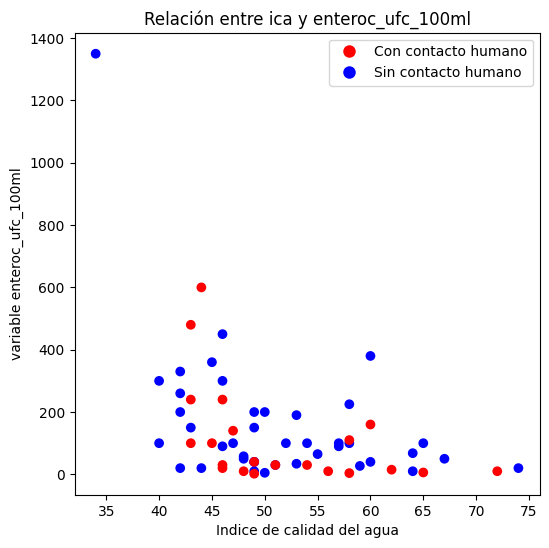

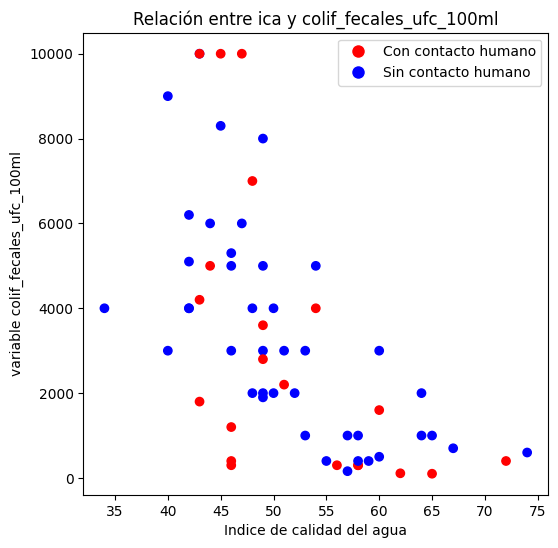

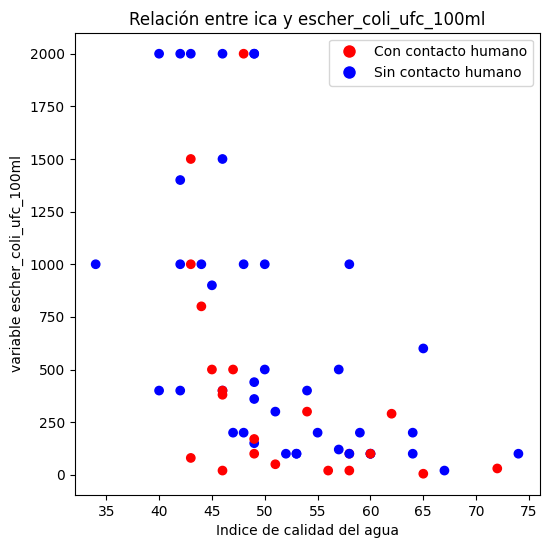

In [285]:
import matplotlib.pyplot as plt
# Crear una nueva columna 'contacto_humano' en el dataset
# Crear una nueva columna 'contacto_humano' en el dataset

preprocessed_dataset['contacto_humano'] = preprocessed_dataset['sitios'].apply(
    lambda val: val in unique_values
)

for j in col:
    # Crear el gráfico de dispersión con colores diferentes para contacto humano y sin contacto humano
    plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
    colors = preprocessed_dataset['contacto_humano'].apply(lambda x: 'red' if x else 'blue')
    plt.scatter(preprocessed_dataset["ica"], preprocessed_dataset[j], c=colors)

    # Agregar etiquetas a los ejes
    plt.xlabel("Indice de calidad del agua")
    plt.ylabel(f"variable {j}")

    # Agregar un título al gráfico
    plt.title(f"Relación entre ica y {j}")

    # Agregar leyenda para los colores
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Con contacto humano'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Sin contacto humano')]
    plt.legend(handles=handles)

    # Mostrar el gráfico
    plt.show()



---


HIPOTESIS 4

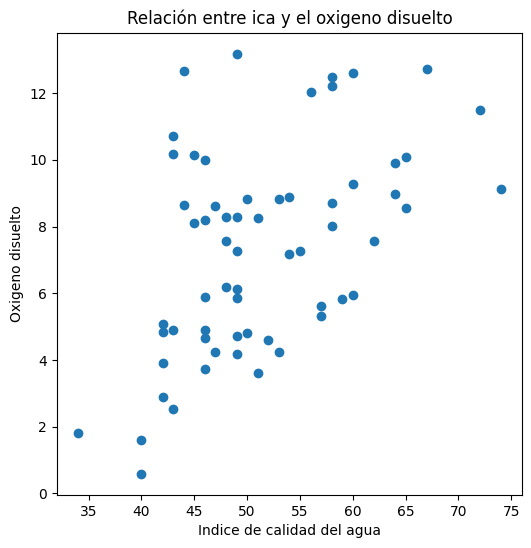

In [286]:
plt.figure(figsize=(6, 6))  # Hacer el gráfico cuadrado
plt.scatter(preprocessed_dataset["ica"], preprocessed_dataset["od"])

# Agregar etiquetas a los ejes
plt.xlabel("Indice de calidad del agua")
plt.ylabel("Oxigeno disuelto")

# Agregar un título al gráfico
plt.title("Relación entre ica y el oxigeno disuelto")

# Mostrar el gráfico
plt.show()

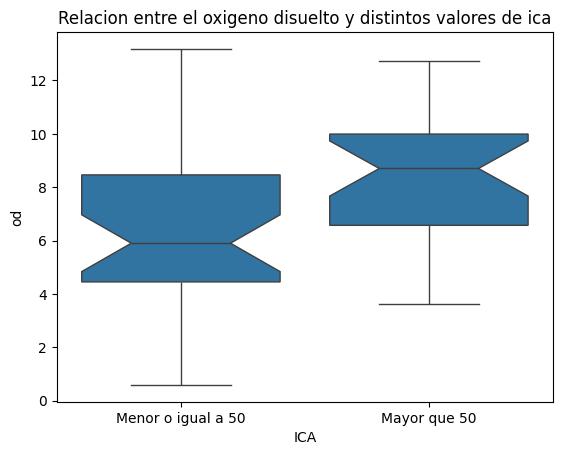

In [287]:
umbral = 50
preprocessed_dataset['grupo'] = preprocessed_dataset['ica'].apply(lambda x: 'Mayor que {}'.format(umbral) if x > umbral else 'Menor o igual a {}'.format(umbral))


sns.boxplot(x='grupo', y='od', data=preprocessed_dataset, notch=True)
plt.title("Relacion entre el oxigeno disuelto y distintos valores de ica")
plt.xlabel("ICA")
plt.show()

In [288]:
# Separamos los datos en dos grupos, ica bajo(menor o igual a 50) e ica alto (mayor a 50)
ica_bajo = preprocessed_dataset[preprocessed_dataset['ica'] <= 50]['od']
ica_alto = preprocessed_dataset[preprocessed_dataset['ica'] > 50]['od']

ica_bajo=ica_bajo.dropna()
ica_alto=ica_alto.dropna()
#Analizamos normalidad
# Test de Shapiro-Wilk para datos con olor
stat, p = shapiro(ica_bajo)
print(f"Test de Shapiro-Wilk para datos con ica bajo: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(ica_alto)
print(f"Test de Shapiro-Wilk para datos con ica alto: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para datos con ica bajo: Estadístico=0.976, p-valor=0.619
Test de Shapiro-Wilk para datos con ica alto: Estadístico=0.956, p-valor=0.292


In [289]:
# Test de Levene para comparar homocedasticidad
stat, p = stats.levene(ica_alto, ica_bajo)
print(f"Test de Levene para colif_fecales_ufc_100ml : Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para colif_fecales_ufc_100ml : Estadístico=0.873, p-valor=0.354


In [290]:
# Test t para comparar la longitud del sépalo entre Setosa y Virginica
t_statistic, p_value = stats.ttest_ind(ica_bajo, ica_alto)
print(f"Test t para od: Estadístico={t_statistic:.3f}, p-valor={p_value:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p_value > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la cantidad de od entre lugares con ica bajo y lugares con ica alto")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la cantidad de od entre lugares con ica bajo y lugares con ica alto")

Test t para od: Estadístico=-2.808, p-valor=0.007
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la cantidad de od entre lugares con ica bajo y lugares con ica alto
